In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

## Data Loading and Inspect Data

In [2]:
df = pd.read_csv("retail_sales_dataset.csv")
df.shape

(1000, 9)

In [3]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


## Data Cleaning 

In [6]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [8]:
# Check data types
df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

## Descriptive Statistics

In [25]:
# Overall Sales Understanding 
df['Total Amount'].mean()
df['Total Amount'].sum()
df['Quantity'].mean()


np.float64(2.514)

In [26]:
df.loc[df['Total Amount'].idxmax()]

Transaction ID                       15
Date                2023-01-16 00:00:00
Customer ID                     CUST015
Gender                           Female
Age                                  42
Product Category            Electronics
Quantity                              4
Price per Unit                      500
Total Amount                       2000
Age Group                      (40, 50]
Name: 14, dtype: object

## Customer & Product Analysis

In [27]:
# Sales by Category
df.groupby('Product Category')['Total Amount'].sum()

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

In [28]:
# Sales by Gender
df.groupby('Gender')['Total Amount'].sum()

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

In [29]:
# Age distribution
df['Age'].describe()

count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: Age, dtype: float64

In [9]:
print("Average Age:", df["Age"].mean())
print("Total Revenue:", df["Total Amount"].sum())
print("Average Order Value:", df["Total Amount"].mean())


Average Age: 41.392
Total Revenue: 456000
Average Order Value: 456.0


In [10]:
category_sales = df.groupby("Product Category")["Total Amount"].sum()
print(category_sales)


Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64


## Visualization

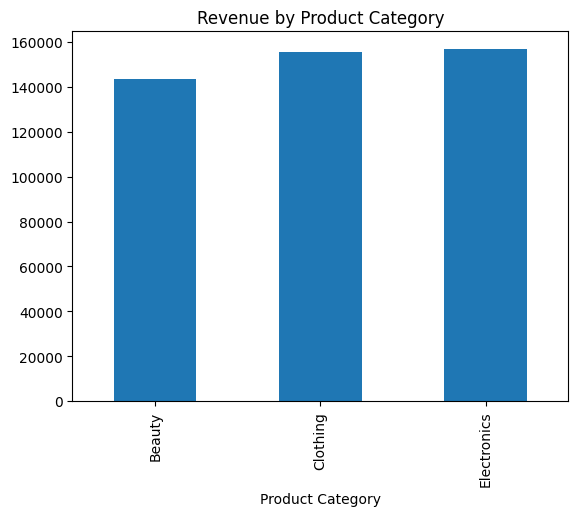

In [19]:
category_sales.plot(kind="bar")
plt.title("Revenue by Product Category")
plt.show()


In [20]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


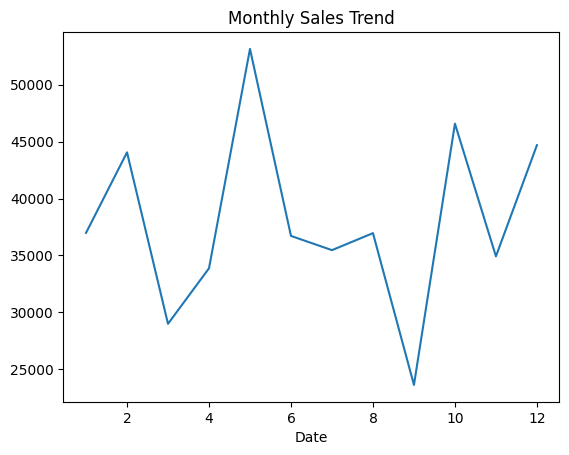

In [21]:
monthly_sales = df.groupby(df["Date"].dt.month)["Total Amount"].sum()
monthly_sales.plot(kind="line")
plt.title("Monthly Sales Trend")
plt.show()

In [22]:
print(df["Date"].dtype)
print(df["Date"].head())

datetime64[ns]
0   2023-11-24
1   2023-02-27
2   2023-01-13
3   2023-05-21
4   2023-05-06
Name: Date, dtype: datetime64[ns]


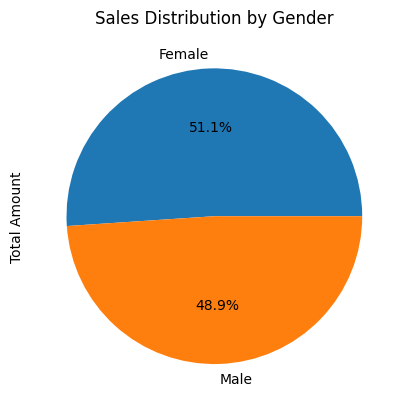

In [23]:
gender_sales = df.groupby("Gender")["Total Amount"].sum()
gender_sales.plot(kind="pie", autopct="%1.1f%%")
plt.title("Sales Distribution by Gender")
plt.show()


In [24]:
# Top spending customers
top_customers = df.groupby("Customer ID")["Total Amount"].sum().sort_values(ascending=False)
print(top_customers.head())

# Average purchase by age group
df["Age Group"] = pd.cut(df["Age"], bins=[18,30,40,50,60])
age_sales = df.groupby("Age Group")["Total Amount"].mean()
print(age_sales)


Customer ID
CUST487    2000
CUST476    2000
CUST773    2000
CUST503    2000
CUST093    2000
Name: Total Amount, dtype: int64
Age Group
(18, 30]    483.055556
(30, 40]    497.150259
(40, 50]    424.411765
(50, 60]    454.931818
Name: Total Amount, dtype: float64


/var/folders/wm/64qp23yn7_5_lssy_r_p_gj40000gn/T/ipykernel_13959/619213413.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = df.groupby("Age Group")["Total Amount"].mean()


## Business Recommendations

Based on the exploratory data analysis of the retail sales dataset, the following recommendations are suggested:

### 1. Focus on high-revenue product categories
Product categories generating the highest total sales should receive more marketing and inventory focus.

### 2. Target key customer demographics
Age groups and gender segments with higher spending patterns should be targeted with personalized promotions.

### 3. Optimize pricing and product bundles
Products frequently purchased together can be offered as bundles to increase transaction value.

### 4. Improve sales during low-performance periods
Time-based analysis can help identify low-sales periods where promotional campaigns can be introduced.

### 5. Strengthen customer retention strategies
Repeat customer patterns can be leveraged through loyalty programs and targeted discounts.
